## Project: Heart Disease. Decision tree classifier

Dataset from Machine learning repository
__[“Heart Disease Data Set”](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)__.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set Information

- age: age in years 
- sex: sex (1 = male; 0 = female) 
- cp: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
-- Value 3: non-anginal pain 
-- Value 4: asymptomatic 
- trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
- chol: serum cholestoral in mg/dl 
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg: resting electrocardiographic results 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
- thalach: maximum heart rate achieved 
- exang: exercise induced angina (1 = yes; 0 = no) 
- oldpeak: ST depression induced by exercise relative to rest 
- place: place of registration disease
-  num: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
(in any major vessel: attributes 59 through 68 are vessels) 

## Data exploration. Basic descriptive statistics

In [2]:
df= pd.read_csv("data/HeartDiseaseData.csv")
df.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [3]:
df.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [4]:
df = df.drop(columns=["Unnamed: 0", "Place", "ID"])
df = df.dropna(how='any')

In [5]:
df = df.rename(str.lower, axis='columns')
df.rename(columns={'num': 'diagnosis'}, inplace=True)
# df.rename(columns={'cp':'chest_pain_type', 'chol': 'cholestoral', 
#                    'thalach': 'maximum_heart_rate_achieved',
#                   'num':'diagnosis', 'oldpeak':'ST_depression',
#                   'fbs': 'fasting_blood_sugar',
#                   'exang': 'exercise'}, inplace=True)

In [6]:
df = pd.get_dummies(df, prefix='sex', columns=['sex'], drop_first = True)

In [7]:
df['restecg'] = df.restecg.replace(regex = 'having ST-T wave abnormality \(T wave inversions and/or ST elevation or depression of > 0.05 mV', value=1)
df['restecg'] = df.restecg.replace(regex = 'normal', value=0)
df['restecg'] = df.restecg.replace(regex = 'showing probable or definite left ventricular hypertrophy by Estes criteria', value=2)
df.restecg.value_counts()

0    248
1     76
2     18
Name: restecg, dtype: int64

In [8]:
df['fbs'] = df.fbs.astype(int)
df['exang'] = df.exang.replace(regex = 'no', value=0)
df['exang'] = df.exang.replace(regex = 'yes', value=1)

In [9]:
df.cp.value_counts()
df['cp'] = df.cp.replace(regex = 'asymptomatic', value=4)
df['cp'] = df.cp.replace(regex = 'atypical angina', value=2)
df['cp'] = df.cp.replace(regex = 'non-anginal pain', value=3)
df['cp'] = df.cp.replace(regex = 'typical angina', value=1)

In [15]:
df.dtypes

age            int64
cp             int64
trestbps     float64
chol         float64
fbs            int32
restecg        int64
thalach      float64
exang          int64
oldpeak      float64
diagnosis      int64
sex_male       uint8
dtype: object

In [39]:
numeric_values = ['age', 'trestbps', 'thalach']

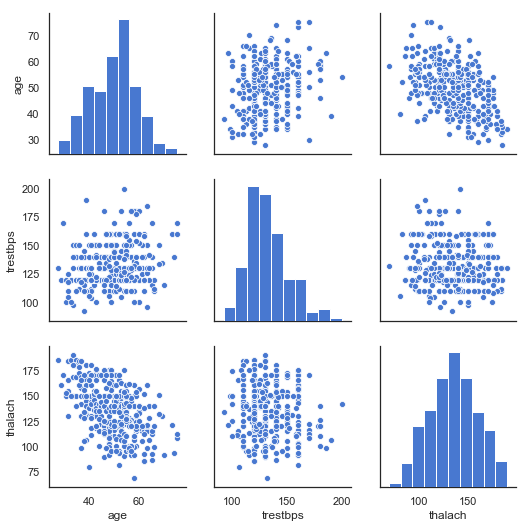

In [68]:
sns.pairplot(df[['age', 'trestbps', 'thalach']])


In [ ]:
# create a correlation heatmap
sns.heatmap(df.select_dtypes([np.number]).corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [ ]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['num']==0].Age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['num']==1].Age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['num']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['num']==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()

Age distribution of healthy patients is much wider than ill people. The latter are at the highest risk in their sixties. Max heart rate distribution does not differ as much, but the risk peaks when max_heart_rate value is between 150 and 170. Higher values are more common for well patients. Below graphs will provide us with another perspective.

In [ ]:
# create swarmplot inside the violinplot
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="num", y="thalach", data=df, inner=None)
sns.swarmplot(x='num', y='thalach', data=df, color='w', alpha=0.5)
plt.subplot(122)
sns.swarmplot(x='num', y='Age', data=df)
plt.show()